# Importing required Libraries

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as XGB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Data Loading

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Project/DATA.csv'

In [ ]:
with open(path, 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [ ]:
df = pd.read_csv(path, encoding=encoding)

In [ ]:
df.head()

,Project_ID,Organization,Short_project_description,Year_technical_go_live,Organisation_profile,Business_domain,Development_method,Primary_programming_language,Development_class,Functional_size_FP,...,Package_with_customization,Steady_heartbeat,Fixed_experienced_team,Many_team_changes_unexperienced_team,Legacy_application,Technology_driven_project,Rules_and_regulations_driven_project,Business_driven_project,Pilot_or_proof_of_concept,Output
0,411,Beltel,T5 Timers - QW from MSP. Small enhancement to ...,2015,Telecommunications,Client and Account Management,Plan-driven,NaN,Conversion (<5% new),35,...,0,0,0,0,0,0,0,1,0,1
1,429,Beltel,Easy Script (clean up master MSISDN). Small en...,2015,Telecommunications,Billing,Plan-driven,NaN,New Development,28,...,0,0,0,0,0,0,0,1,0,1
2,430,Beltel,Campaign Management Tool (Comviva) WP05. Sub-p...,2015,Telecommunications,Client and Account Management,Plan-driven,NaN,Major Enhancement (25-75% new),50,...,0,0,0,0,0,0,0,1,0,1
3,403,Beltel,Campaign Management - Change Request 2. Sub-pr...,2015,Telecommunications,Data Warehouse & BI,Scrum,NaN,Conversion (<5% new),177,...,0,0,0,0,0,0,0,1,0,1
4,434,Beltel,Integrate payment by Credit-card Aliases. Smal...,2015,Telecommunications,Internet & Mobile,Plan-driven,NaN,Major Enhancement (25-75% new),12,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Project_ID                            492 non-null    int64  
 1   Organization                          492 non-null    object 
 2   Short_project_description             492 non-null    object 
 3   Year_technical_go_live                492 non-null    int64  
 4   Organisation_profile                  492 non-null    object 
 5   Business_domain                       492 non-null    object 
 6   Development_method                    492 non-null    object 
 7   Primary_programming_language          350 non-null    object 
 8   Development_class                     492 non-null    object 
 9   Functional_size_FP                    492 non-null    int64  
 10  Actual_duration_months                492 non-null    float64
 11  Actual_cost_EUR    

In [ ]:
df.isnull().sum()

Project_ID                                0
Organization                              0
Short_project_description                 0
Year_technical_go_live                    0
Organisation_profile                      0
Business_domain                           0
Development_method                        0
Primary_programming_language            142
Development_class                         0
Functional_size_FP                        0
Actual_duration_months                    0
Actual_cost_EUR                           0
Actual_effort_hours                     470
Defects_process                         222
Defects_first_month                     432
Stakeholder_satisfaction_process        471
Stakeholder Satisfaction - Product      471
Perceived_value_overall                 472
Release_based_working                     0
Once_only_project                         0
Multi_application_release                 0
Phased_project                            0
Dependencies_with_other_applicat

# Data Correction

In [ ]:
# prompt: need to replace ',' with '.' in  Stakeholder_satisfaction_process and Stakeholder Satisfaction - Product

df['Stakeholder_satisfaction_process'] = df['Stakeholder_satisfaction_process'].str.replace(',', '.')
df['Stakeholder Satisfaction - Product'] = df['Stakeholder Satisfaction - Product'].str.replace(',', '.')
df['Perceived_value_overall'] = df['Perceived_value_overall'].str.replace(',', '.')

In [ ]:
# remove ',' from Actual_cost_EUR

df['Actual_cost_EUR'] = df['Actual_cost_EUR'].str.replace(',', '')

In [ ]:
df.head()

,Project_ID,Organization,Short_project_description,Year_technical_go_live,Organisation_profile,Business_domain,Development_method,Primary_programming_language,Development_class,Functional_size_FP,...,Package_with_customization,Steady_heartbeat,Fixed_experienced_team,Many_team_changes_unexperienced_team,Legacy_application,Technology_driven_project,Rules_and_regulations_driven_project,Business_driven_project,Pilot_or_proof_of_concept,Output
0,411,Beltel,T5 Timers - QW from MSP. Small enhancement to ...,2015,Telecommunications,Client and Account Management,Plan-driven,NaN,Conversion (<5% new),35,...,0,0,0,0,0,0,0,1,0,1
1,429,Beltel,Easy Script (clean up master MSISDN). Small en...,2015,Telecommunications,Billing,Plan-driven,NaN,New Development,28,...,0,0,0,0,0,0,0,1,0,1
2,430,Beltel,Campaign Management Tool (Comviva) WP05. Sub-p...,2015,Telecommunications,Client and Account Management,Plan-driven,NaN,Major Enhancement (25-75% new),50,...,0,0,0,0,0,0,0,1,0,1
3,403,Beltel,Campaign Management - Change Request 2. Sub-pr...,2015,Telecommunications,Data Warehouse & BI,Scrum,NaN,Conversion (<5% new),177,...,0,0,0,0,0,0,0,1,0,1
4,434,Beltel,Integrate payment by Credit-card Aliases. Smal...,2015,Telecommunications,Internet & Mobile,Plan-driven,NaN,Major Enhancement (25-75% new),12,...,0,0,0,0,0,0,0,1,0,0


# Identifying categorical and numerical columns

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [ ]:
df[categorical_cols].head()

,Organization,Short_project_description,Organisation_profile,Business_domain,Development_method,Primary_programming_language,Development_class,Actual_cost_EUR,Actual_effort_hours,Defects_process,Stakeholder_satisfaction_process,Stakeholder Satisfaction - Product,Perceived_value_overall
0,Beltel,T5 Timers - QW from MSP. Small enhancement to ...,Telecommunications,Client and Account Management,Plan-driven,NaN,Conversion (<5% new),110643,NaN,30,2.50,2.50,3.06
1,Beltel,Easy Script (clean up master MSISDN). Small en...,Telecommunications,Billing,Plan-driven,NaN,New Development,67733,NaN,7,2.60,3.00,2.96
2,Beltel,Campaign Management Tool (Comviva) WP05. Sub-p...,Telecommunications,Client and Account Management,Plan-driven,NaN,Major Enhancement (25-75% new),143575,34,72,2.75,3.75,3.71
3,Beltel,Campaign Management - Change Request 2. Sub-pr...,Telecommunications,Data Warehouse & BI,Scrum,NaN,Conversion (<5% new),143575,NaN,142,2.83,2.83,3.63
4,Beltel,Integrate payment by Credit-card Aliases. Smal...,Telecommunications,Internet & Mobile,Plan-driven,NaN,Major Enhancement (25-75% new),38455,NaN,4,3.00,4.00,NaN


In [ ]:
# Converting respective object columns to numeric.

df['Actual_cost_EUR'] = pd.to_numeric(df['Actual_cost_EUR'], errors='coerce')
df['Actual_cost_EUR'].dtype

dtype('int64')

In [ ]:
df['Actual_effort_hours'] = pd.to_numeric(df['Actual_effort_hours'], errors='coerce')
df['Actual_effort_hours'].dtype

dtype('float64')

In [ ]:
df['Defects_process'] = pd.to_numeric(df['Defects_process'], errors='coerce')
df['Defects_process'].dtype

dtype('float64')

In [ ]:
df['Stakeholder_satisfaction_process'] = pd.to_numeric(df['Stakeholder_satisfaction_process'], errors='coerce')
df['Stakeholder_satisfaction_process'].dtype

dtype('float64')

In [ ]:
df['Stakeholder Satisfaction - Product'] = pd.to_numeric(df['Stakeholder Satisfaction - Product'], errors='coerce')
df['Stakeholder Satisfaction - Product'].dtype

dtype('float64')

In [ ]:
df['Perceived_value_overall'] = pd.to_numeric(df['Perceived_value_overall'], errors='coerce')
df['Perceived_value_overall'].dtype

dtype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Project_ID                            492 non-null    int64  
 1   Organization                          492 non-null    object 
 2   Short_project_description             492 non-null    object 
 3   Year_technical_go_live                492 non-null    int64  
 4   Organisation_profile                  492 non-null    object 
 5   Business_domain                       492 non-null    object 
 6   Development_method                    492 non-null    object 
 7   Primary_programming_language          350 non-null    object 
 8   Development_class                     492 non-null    object 
 9   Functional_size_FP                    492 non-null    int64  
 10  Actual_duration_months                492 non-null    float64
 11  Actual_cost_EUR    

Identifying categorical and numerical columns

In [ ]:
cat_col = df.select_dtypes(include='object').columns.tolist()
num_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
df[cat_col].head()

,Organization,Short_project_description,Organisation_profile,Business_domain,Development_method,Primary_programming_language,Development_class
0,Beltel,T5 Timers - QW from MSP. Small enhancement to ...,Telecommunications,Client and Account Management,Plan-driven,NaN,Conversion (<5% new)
1,Beltel,Easy Script (clean up master MSISDN). Small en...,Telecommunications,Billing,Plan-driven,NaN,New Development
2,Beltel,Campaign Management Tool (Comviva) WP05. Sub-p...,Telecommunications,Client and Account Management,Plan-driven,NaN,Major Enhancement (25-75% new)
3,Beltel,Campaign Management - Change Request 2. Sub-pr...,Telecommunications,Data Warehouse & BI,Scrum,NaN,Conversion (<5% new)
4,Beltel,Integrate payment by Credit-card Aliases. Smal...,Telecommunications,Internet & Mobile,Plan-driven,NaN,Major Enhancement (25-75% new)


# Handling missing values


In [ ]:
df[num_col].info()
df[num_col].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Project_ID                            492 non-null    int64  
 1   Year_technical_go_live                492 non-null    int64  
 2   Functional_size_FP                    492 non-null    int64  
 3   Actual_duration_months                492 non-null    float64
 4   Actual_cost_EUR                       492 non-null    int64  
 5   Actual_effort_hours                   12 non-null     float64
 6   Defects_process                       268 non-null    float64
 7   Defects_first_month                   60 non-null     float64
 8   Stakeholder_satisfaction_process      21 non-null     float64
 9   Stakeholder Satisfaction - Product    21 non-null     float64
 10  Perceived_value_overall               20 non-null     float64
 11  Release_based_worki

Project_ID                                0
Year_technical_go_live                    0
Functional_size_FP                        0
Actual_duration_months                    0
Actual_cost_EUR                           0
Actual_effort_hours                     480
Defects_process                         224
Defects_first_month                     432
Stakeholder_satisfaction_process        471
Stakeholder Satisfaction - Product      471
Perceived_value_overall                 472
Release_based_working                     0
Once_only_project                         0
Multi_application_release                 0
Phased_project                            0
Dependencies_with_other_applications      0
Single_application                        0
Migration_project                         0
Problems_with_external_supplier           0
Security_related_project                  0
Package_of_the_shelf                      0
Package_with_customization                0
Steady_heartbeat                

In [ ]:
# Replacing missing values in numerical columns with the mean

df[num_col] = df[num_col].fillna(df[num_col].mean())

In [ ]:
# Replacing missing values in categorical columns with the mode

df[cat_col] = df[cat_col].fillna(df[cat_col].mode().iloc[0])

In [ ]:
df.isnull().sum()

Project_ID                              0
Organization                            0
Short_project_description               0
Year_technical_go_live                  0
Organisation_profile                    0
Business_domain                         0
Development_method                      0
Primary_programming_language            0
Development_class                       0
Functional_size_FP                      0
Actual_duration_months                  0
Actual_cost_EUR                         0
Actual_effort_hours                     0
Defects_process                         0
Defects_first_month                     0
Stakeholder_satisfaction_process        0
Stakeholder Satisfaction - Product      0
Perceived_value_overall                 0
Release_based_working                   0
Once_only_project                       0
Multi_application_release               0
Phased_project                          0
Dependencies_with_other_applications    0
Single_application                

In [ ]:
df.head()

,Project_ID,Organization,Short_project_description,Year_technical_go_live,Organisation_profile,Business_domain,Development_method,Primary_programming_language,Development_class,Functional_size_FP,...,Package_with_customization,Steady_heartbeat,Fixed_experienced_team,Many_team_changes_unexperienced_team,Legacy_application,Technology_driven_project,Rules_and_regulations_driven_project,Business_driven_project,Pilot_or_proof_of_concept,Output
0,411,Beltel,T5 Timers - QW from MSP. Small enhancement to ...,2015,Telecommunications,Client and Account Management,Plan-driven,JAVA,Conversion (<5% new),35,...,0,0,0,0,0,0,0,1,0,1
1,429,Beltel,Easy Script (clean up master MSISDN). Small en...,2015,Telecommunications,Billing,Plan-driven,JAVA,New Development,28,...,0,0,0,0,0,0,0,1,0,1
2,430,Beltel,Campaign Management Tool (Comviva) WP05. Sub-p...,2015,Telecommunications,Client and Account Management,Plan-driven,JAVA,Major Enhancement (25-75% new),50,...,0,0,0,0,0,0,0,1,0,1
3,403,Beltel,Campaign Management - Change Request 2. Sub-pr...,2015,Telecommunications,Data Warehouse & BI,Scrum,JAVA,Conversion (<5% new),177,...,0,0,0,0,0,0,0,1,0,1
4,434,Beltel,Integrate payment by Credit-card Aliases. Smal...,2015,Telecommunications,Internet & Mobile,Plan-driven,JAVA,Major Enhancement (25-75% new),12,...,0,0,0,0,0,0,0,1,0,0


# Data Visualization

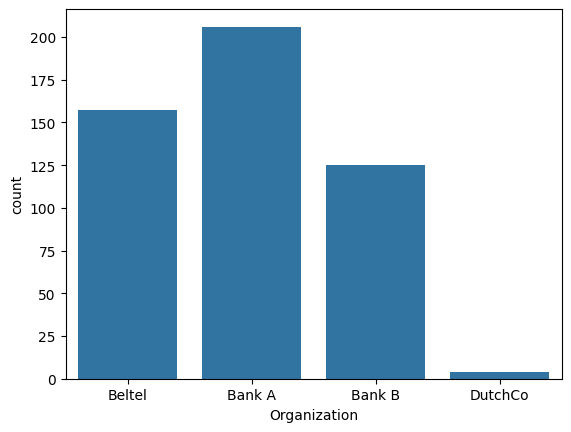

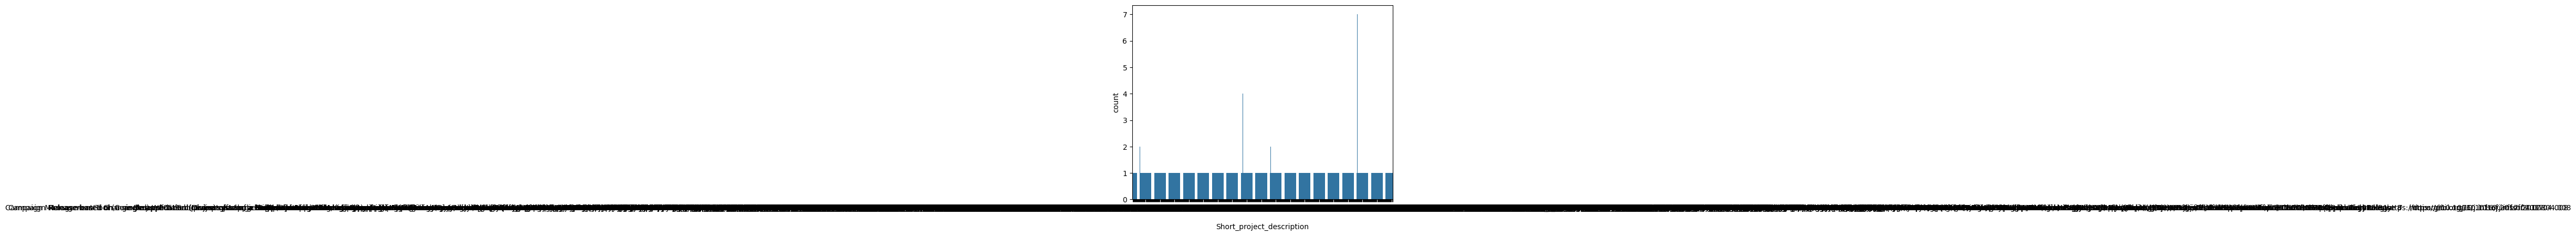

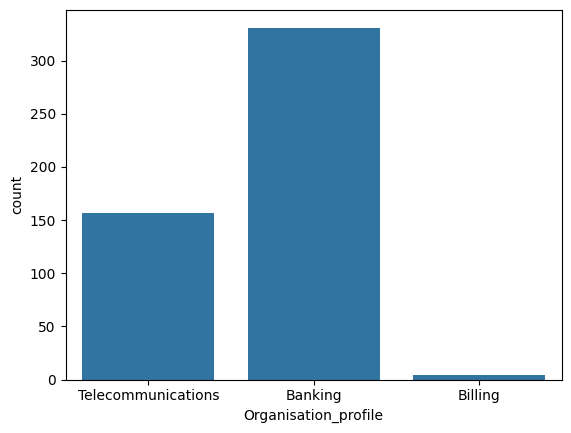

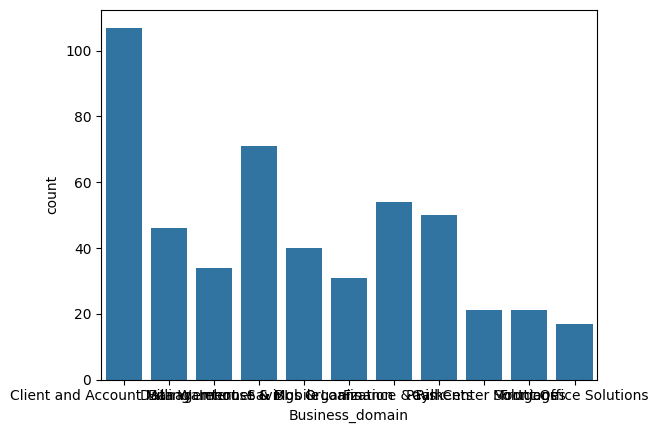

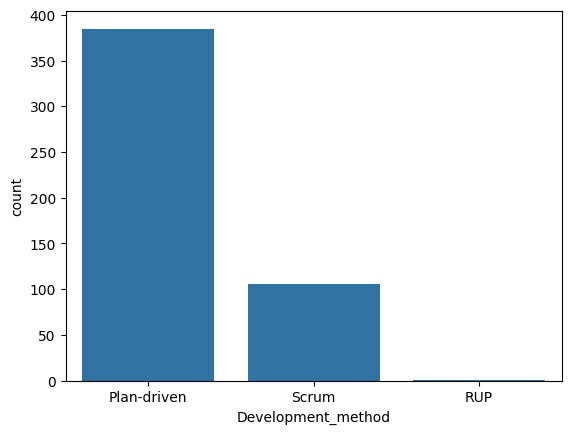

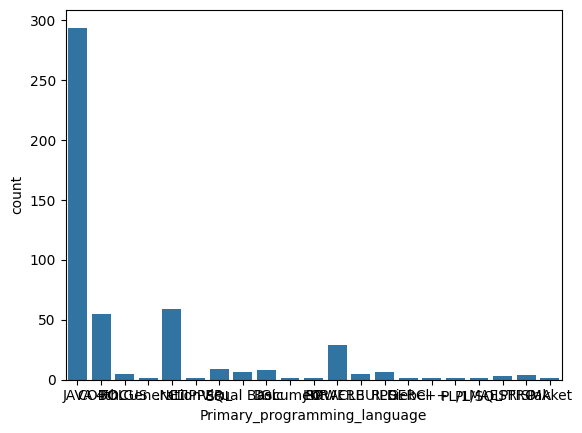

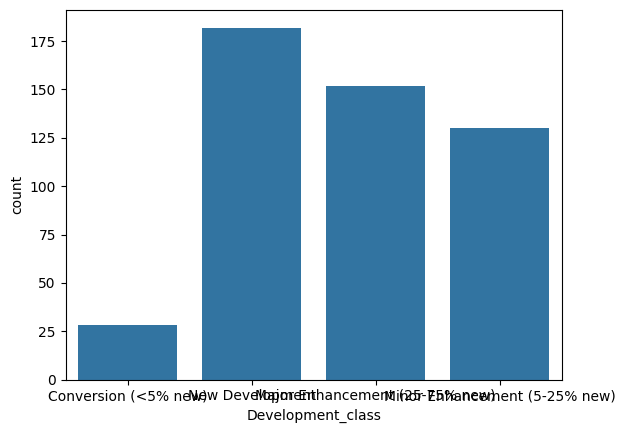

In [ ]:
# Bar plots for categorical columns

for col in df.select_dtypes(include='object'):
    sns.countplot(x=col, data=df)
    plt.show()

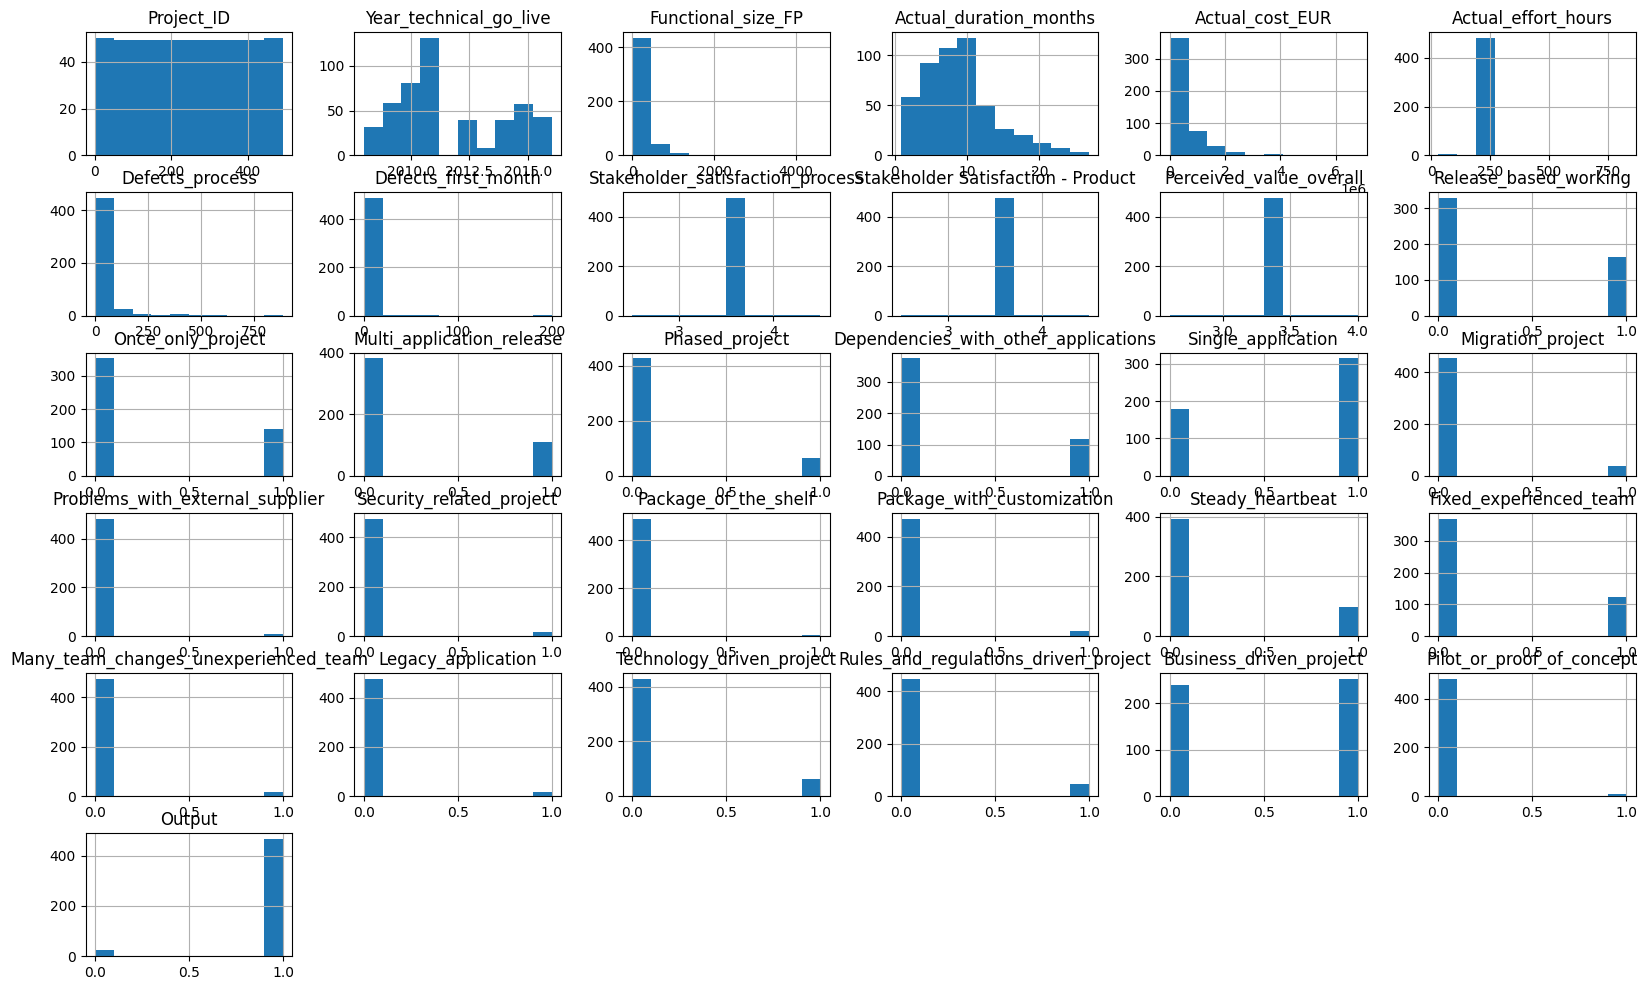

In [ ]:
# Histograms for numerical columns

df.hist(figsize=(20,12), bins=10)
plt.show()

In [ ]:
df.describe()

,Project_ID,Year_technical_go_live,Functional_size_FP,Actual_duration_months,Actual_cost_EUR,Actual_effort_hours,Defects_process,Defects_first_month,Stakeholder_satisfaction_process,Stakeholder Satisfaction - Product,...,Package_with_customization,Steady_heartbeat,Fixed_experienced_team,Many_team_changes_unexperienced_team,Legacy_application,Technology_driven_project,Rules_and_regulations_driven_project,Business_driven_project,Pilot_or_proof_of_concept,Output
count,492.000000,492.000000,492.000000,492.000000,4.920000e+02,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,246.500000,2011.666667,220.264228,8.950285,5.928017e+05,241.750000,60.955224,8.833333,3.520952,3.604762,...,0.038618,0.199187,0.247967,0.036585,0.030488,0.128049,0.091463,0.514228,0.020325,0.947154
std,142.172431,2.397102,382.640003,4.808477,9.486768e+05,42.999319,86.181775,9.873573,0.118999,0.113738,...,0.192879,0.399795,0.432272,0.187933,0.172100,0.334484,0.288560,0.500306,0.141254,0.223953
min,1.000000,2008.000000,4.000000,0.900000,3.290000e+02,31.000000,0.000000,0.000000,2.500000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,123.750000,2010.000000,38.750000,5.397500,7.079550e+04,241.750000,18.000000,8.833333,3.520952,3.604762,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,246.500000,2011.000000,116.000000,8.410000,2.781555e+05,241.750000,60.955224,8.833333,3.520952,3.604762,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,369.250000,2014.000000,250.250000,11.070000,6.995265e+05,241.750000,60.955224,8.833333,3.520952,3.604762,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,492.000000,2016.000000,4600.000000,26.840000,6.802466e+06,827.000000,888.000000,200.000000,4.500000,4.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.corr()['Output']

<ipython-input-342-601b5c7863af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Output']


Project_ID                             -1.720036e-01
Year_technical_go_live                 -1.694569e-01
Functional_size_FP                      3.619384e-02
Actual_duration_months                 -3.781151e-02
Actual_cost_EUR                         2.798193e-02
Actual_effort_hours                     4.457262e-02
Defects_process                         1.055859e-02
Defects_first_month                    -9.671128e-03
Stakeholder_satisfaction_process        3.981213e-02
Stakeholder Satisfaction - Product     -3.160210e-02
Perceived_value_overall                 5.247046e-18
Release_based_working                   1.092080e-01
Once_only_project                       6.842602e-02
Multi_application_release              -8.985605e-02
Phased_project                         -6.881912e-02
Dependencies_with_other_applications    2.524264e-02
Single_application                     -7.685560e-03
Migration_project                      -6.520597e-02
Problems_with_external_supplier        -3.5550

<ipython-input-343-eb744b0b6e4d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


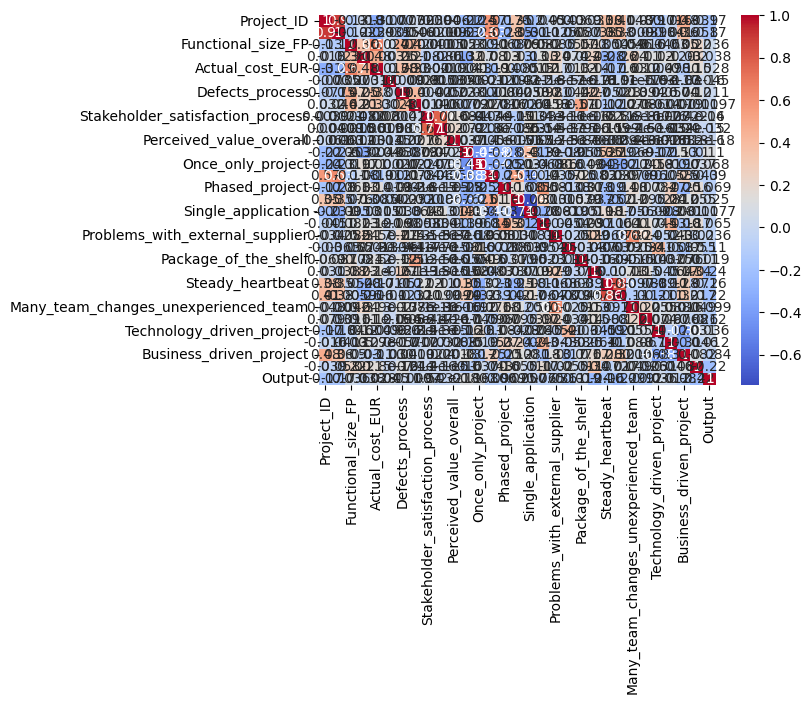

In [ ]:
# Correlation matrix

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Normalization


In [ ]:
x = ['Release_based_working', 'Once_only_project', 'Multi_application_release', 'Phased_project', 'Dependencies_with_other_applications', 'Single_application', 'Migration_project', 'Problems_with_external_supplier', 'Security_related_project', 'Package_of_the_shelf', 'Package_with_customization', 'Steady_heartbeat', 'Fixed_experienced_team', 'Many_team_changes_unexperienced_team', 'Legacy_application', 'Technology_driven_project', 'Rules_and_regulations_driven_project', 'Business_driven_project', 'Pilot_or_proof_of_concept', 'Output']

for i in x:
  if i in num_col:
    num_col.remove(i)

df[num_col].head()

,Project_ID,Year_technical_go_live,Functional_size_FP,Actual_duration_months,Actual_cost_EUR,Actual_effort_hours,Defects_process,Defects_first_month,Stakeholder_satisfaction_process,Stakeholder Satisfaction - Product,Perceived_value_overall
0,411,2015,35,19.03,110643,241.75,30.0,1.000000,2.50,2.50,3.0600
1,429,2015,28,10.29,67733,241.75,7.0,8.833333,2.60,3.00,2.9600
2,430,2015,50,11.90,143575,34.00,72.0,8.833333,2.75,3.75,3.7100
3,403,2015,177,9.69,143575,241.75,142.0,8.833333,2.83,2.83,3.6300
4,434,2015,12,10.29,38455,241.75,4.0,8.833333,3.00,4.00,3.3705


In [ ]:
# Normalizing numerical data using Standardscaler


scaler = StandardScaler()
df[num_col]=scaler.fit_transform(df[num_col])
df[num_col].head()

,Project_ID,Year_technical_go_live,Functional_size_FP,Actual_duration_months,Actual_cost_EUR,Actual_effort_hours,Defects_process,Defects_first_month,Stakeholder_satisfaction_process,Stakeholder Satisfaction - Product,Perceived_value_overall
0,1.158223,1.391984,-0.484667,2.098372,-0.508761,0.000000,-0.359551,-0.794171,-8.588207,-9.723115,-4.337084
1,1.284959,1.391984,-0.502979,0.278899,-0.554038,0.000000,-0.626700,0.000000,-7.747012,-5.322567,-5.733891
2,1.292000,1.391984,-0.445425,0.614065,-0.474012,-4.836389,0.128287,0.000000,-6.485218,1.278254,4.742158
3,1.101896,1.391984,-0.113183,0.153992,-0.474012,0.000000,0.941351,0.000000,-5.812262,-6.818754,3.624713
4,1.320163,1.391984,-0.544836,0.278899,-0.584931,0.000000,-0.661546,0.000000,-4.382229,3.478528,0.000000


# Data Splitting

In [ ]:
df.head()
df.shape

(492, 38)

In [ ]:
X = df.drop('Output',axis=1)
Y = df['Output']
X.head()

,Project_ID,Organization,Short_project_description,Year_technical_go_live,Organisation_profile,Business_domain,Development_method,Primary_programming_language,Development_class,Functional_size_FP,...,Package_of_the_shelf,Package_with_customization,Steady_heartbeat,Fixed_experienced_team,Many_team_changes_unexperienced_team,Legacy_application,Technology_driven_project,Rules_and_regulations_driven_project,Business_driven_project,Pilot_or_proof_of_concept
0,1.158223,Beltel,T5 Timers - QW from MSP. Small enhancement to ...,1.391984,Telecommunications,Client and Account Management,Plan-driven,JAVA,Conversion (<5% new),-0.484667,...,0,0,0,0,0,0,0,0,1,0
1,1.284959,Beltel,Easy Script (clean up master MSISDN). Small en...,1.391984,Telecommunications,Billing,Plan-driven,JAVA,New Development,-0.502979,...,0,0,0,0,0,0,0,0,1,0
2,1.292000,Beltel,Campaign Management Tool (Comviva) WP05. Sub-p...,1.391984,Telecommunications,Client and Account Management,Plan-driven,JAVA,Major Enhancement (25-75% new),-0.445425,...,0,0,0,0,0,0,0,0,1,0
3,1.101896,Beltel,Campaign Management - Change Request 2. Sub-pr...,1.391984,Telecommunications,Data Warehouse & BI,Scrum,JAVA,Conversion (<5% new),-0.113183,...,0,0,0,0,0,0,0,0,1,0
4,1.320163,Beltel,Integrate payment by Credit-card Aliases. Smal...,1.391984,Telecommunications,Internet & Mobile,Plan-driven,JAVA,Major Enhancement (25-75% new),-0.544836,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape
X_test.shape

(99, 37)

In [ ]:
Y_train.shape
Y_test.shape

(99,)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Project_ID                            492 non-null    float64
 1   Organization                          492 non-null    object 
 2   Short_project_description             492 non-null    object 
 3   Year_technical_go_live                492 non-null    float64
 4   Organisation_profile                  492 non-null    object 
 5   Business_domain                       492 non-null    object 
 6   Development_method                    492 non-null    object 
 7   Primary_programming_language          492 non-null    object 
 8   Development_class                     492 non-null    object 
 9   Functional_size_FP                    492 non-null    float64
 10  Actual_duration_months                492 non-null    float64
 11  Actual_cost_EUR    

In [ ]:
X_train.dtypes

Project_ID                              float64
Organization                             object
Short_project_description                object
Year_technical_go_live                  float64
Organisation_profile                     object
Business_domain                          object
Development_method                       object
Primary_programming_language             object
Development_class                        object
Functional_size_FP                      float64
Actual_duration_months                  float64
Actual_cost_EUR                         float64
Actual_effort_hours                     float64
Defects_process                         float64
Defects_first_month                     float64
Stakeholder_satisfaction_process        float64
Stakeholder Satisfaction - Product      float64
Perceived_value_overall                 float64
Release_based_working                     int64
Once_only_project                         int64
Multi_application_release               

In [ ]:
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = pd.Categorical(X_train[col]).codes

In [ ]:
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = pd.Categorical(X_test[col]).codes

# Model Building

**XGBoost Classifier**

In [ ]:

xgb_cl = XGB.XGBClassifier()
xgb_cl.fit(X_train, Y_train)
Y_pred = xgb_cl.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy(XGBoost): {accuracy}")


Accuracy(XGBoost): 0.9393939393939394


In [ ]:
Y_pred = xgb_cl.predict(X_train)
print("Training Accuracy Score is",accuracy_score(Y_train,Y_pred))
Y_pred = xgb_cl.predict(X_test)
print("Testing Accuracy Score is",accuracy_score(Y_test,Y_pred))

Training Accuracy Score is 1.0
Testing Accuracy Score is 0.9393939393939394


In [ ]:
# Hyper parameter tuning

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb = XGB.XGBClassifier()
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=15, scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train, Y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

best_estimator = grid_search.best_estimator_

accuracy = best_estimator.score(X_test, Y_test)
print("Test Accuracy: ", accuracy)

Best Parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best Score:  0.9441595441595443
Test Accuracy:  0.9595959595959596
